# Automatic Object Cropping with SAM and YOLOv8 Models

![Last Commit](https://img.shields.io/github/last-commit/JVPC0D3R/auto-segment)
![GitHub](https://img.shields.io/github/license/JVPC0D3R/auto-segment)


<p align = "justify">
This IPython Notebook demonstrates how to automatically crop objects from images using SAM and YOLOv8 models. The notebook generates one PNG file for each detected object, allowing for efficient object extraction.
</p>

<p align = "center">
  <img src = "./resources/auto-segment.gif" width = "100%">
</p>

<p align="center"><em>Auto-segment pixel-art by JVPC0D3R</em></p>

<p align = "justify">
This notebook was created by <a href = "https://github.com/JVPC0D3R" > JVPC0D3R</a>. 
</p>

## Connect with Google Drive

In [ ]:
# Mount your personal Google Drive

from google.colab import drive
drive.mount('/content/drive')

## Install packages

In [ ]:
! pip install roboflow ultralytics 'git+https://github.com/facebookresearch/segment-anything.git'

## Download SAM weights

In [ ]:
! wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

## Upload your Image

In [ ]:
from google.colab import files

# Prompt the user to upload a single image file
uploaded = files.upload()

# Process the uploaded image path
for filename in uploaded.keys():
    img_path = filename
    print("Image uploaded:", img_path)

## Let's crop!

In [19]:
# Import all the packages

from IPython.display import display, Image
from roboflow import Roboflow
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from PIL import Image

In [3]:
# Load the YOLOv8 model
yolo = YOLO('yolov8n.pt')

# Set up SAM
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint = sam_checkpoint)
sam.to(device = "cuda")

segmentator = SamPredictor(sam)

0: 640x480 4 persons, 1 bus, 9.7ms
Speed: 7.4ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


5


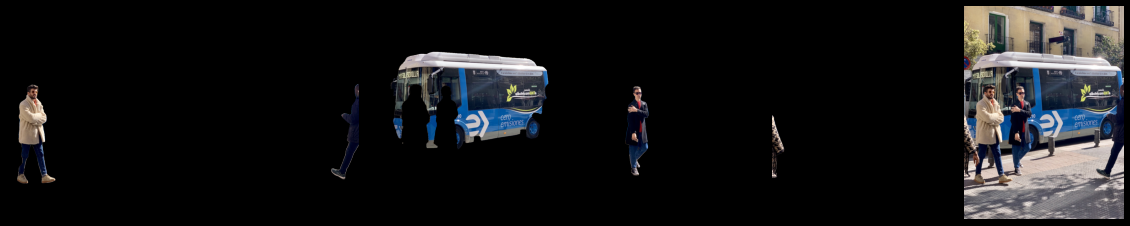

In [21]:
 # Load image
img = cv2.imread(img_path)

# Conver from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Predict bounding boxes
result = yolo.predict(source = img)

# Set image for SAM
segmentator.set_image(img)

boxes = result[0].boxes

# Get plot size
plot_size = len(boxes.xyxy.tolist())

print(plot_size)

# Init plot
plt.style.use('dark_background')
fig, axs = plt.subplots(1, plot_size + 1, figsize=(20, 20))


for i, bbox in enumerate(boxes.xyxy.tolist()):

    input_box = np.array(bbox)
    mask, _, _ = segmentator.predict(
            point_coords=None,
            point_labels=None,
            box=input_box[None, :],
            multimask_output=False,
        )

    segmentation_mask = mask[0]

    # Convert the segmentation mask to a binary mask
    binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

    # Create the alpha channel scaled to 255
    alpha_channel = (binary_mask * 255).astype(np.uint8)

    # Stack the RGB image with the alpha channel
    object = np.dstack((img, alpha_channel))

    
    axs[i].axis('off')
    axs[i].imshow(object)

axs[plot_size].axis('off')
axs[plot_size].imshow(img)
    
plt.show()